In [1]:
#enable python code to work with HTML
import cgitb 
cgitb.enable()

#import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.widgets import Slider
from matplotlib.pyplot import figure

In [2]:
#import the dataset
df = pd.read_csv('/home/michaud_reyna/covid19MH.csv')

In [3]:
#display dataset as a pandas dataframe
df.head()

Indicator              Group          State  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        Subgroup Phase  Time Period Time Period Label Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5             04/23/2020   
1  18 - 29 years     1            1    Apr 23 - May 5             04/23/2020   
2  30 - 39 years     1            1    Apr 23 - May 5             04/23/2020   
3  40 - 49 years     1            1    Apr 23 - May 5             04/23/2020   
4  50 - 59 years     1            1    Apr 23 - May 5             04/23/2020   

  Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0           05/05/2020   23.5    22.7     24.3         22.7 - 24.3   
1           05/05/2020   32.7    30.2     35.2         30.2 - 35.2   
2           05/05/2020   25.7    24.1     27.3         24.1 - 27.3   
3           05/05/2020   24.8    23.3     26.2         23.3 - 26.2   
4           05/05/2020   23.2    21.5     25.0         21.5 - 25.0   

  Quartile Range  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [4]:
#display different indicators
uniqueRows = df['Indicator'].drop_duplicates()
print(uniqueRows)

0                        Symptoms of Depressive Disorder
70                          Symptoms of Anxiety Disorder
140    Symptoms of Anxiety Disorder or Depressive Dis...
Name: Indicator, dtype: object


In [5]:
#create separate dataframes for each indicator
isDepressive = df['Indicator'] == "Symptoms of Depressive Disorder"
isAnxiety = df['Indicator'] == "Symptoms of Anxiety Disorder"
isBoth = df['Indicator'] == "Symptoms of Anxiety Disorder or Depressive Disorder"

depressiveDF = df[isDepressive] 
anxietyDF = df[isAnxiety]
bothDF = df[isBoth]

#display specific dataframe
anxietyDF.head()

#groupsID = df['Group'].drop_duplicates()
#print(groupsID)

#isState = depressiveDF['State'] == "Texas"
#stateDF = depressiveDF[isState]

isState = depressiveDF[(depressiveDF['State']=="Texas") & (depressiveDF['Time Period']==1)]

a = isState['Value']


isUS = depressiveDF[(depressiveDF['Group']=='By State') & (depressiveDF['Time Period']==1)]
isUS.head()


Indicator     Group       State    Subgroup Phase  \
19  Symptoms of Depressive Disorder  By State     Alabama     Alabama     1   
20  Symptoms of Depressive Disorder  By State      Alaska      Alaska     1   
21  Symptoms of Depressive Disorder  By State     Arizona     Arizona     1   
22  Symptoms of Depressive Disorder  By State    Arkansas    Arkansas     1   
23  Symptoms of Depressive Disorder  By State  California  California     1   

    Time Period Time Period Label Time Period Start Date Time Period End Date  \
19            1    Apr 23 - May 5             04/23/2020           05/05/2020   
20            1    Apr 23 - May 5             04/23/2020           05/05/2020   
21            1    Apr 23 - May 5             04/23/2020           05/05/2020   
22            1    Apr 23 - May 5             04/23/2020           05/05/2020   
23            1    Apr 23 - May 5             04/23/2020           05/05/2020   

    Value  Low CI  High CI Confidence Interval Quartile Range  
19   18.6    14.6     23.1         14.6 - 23.1    16.5 - 20.7  
20   19.2    16.8     21.8         16.8 - 21.8    16.5 - 20.7  
21   22.4    19.4     25.5         19.4 - 25.5    22.2 - 24.0  
22   26.6    22.3     31.3         22.3 - 31.3    24.1 - 28.7  
23   25.4    22.5     28.6         22.5 - 28.6    24.1 - 28.7

In [6]:
#creating baseline dataframe for DEPRESSIVE SYMPTOMS
isNE = depressiveDF['Group'] == 'National Estimate'
isNEA = anxietyDF['Group'] == 'National Estimate'
isNEB = bothDF['Group'] == 'National Estimate'

In [7]:
NE = depressiveDF[isNE]
NEA = anxietyDF[isNEA]
NEB = bothDF[isNEB]

In [8]:
#display depressive systems values over the time periods based on the national estimate
NE.head()

Indicator              Group          State  \
0    Symptoms of Depressive Disorder  National Estimate  United States   
210  Symptoms of Depressive Disorder  National Estimate  United States   
420  Symptoms of Depressive Disorder  National Estimate  United States   
630  Symptoms of Depressive Disorder  National Estimate  United States   
840  Symptoms of Depressive Disorder  National Estimate  United States   

          Subgroup Phase  Time Period Time Period Label  \
0    United States     1            1    Apr 23 - May 5   
210  United States     1            2    May 7 - May 12   
420  United States     1            3   May 14 - May 19   
630  United States     1            4   May 21 - May 26   
840  United States     1            5   May 28 - June 2   

    Time Period Start Date Time Period End Date  Value  Low CI  High CI  \
0               04/23/2020           05/05/2020   23.5    22.7     24.3   
210             05/07/2020           05/12/2020   24.1    23.0     25.2   
420             05/14/2020           05/19/2020   24.4    23.7     25.2   
630             05/21/2020           05/26/2020   24.9    24.1     25.7   
840             05/28/2020           06/02/2020   25.3    24.7     25.8   

    Confidence Interval Quartile Range  
0           22.7 - 24.3            NaN  
210         23.0 - 25.2            NaN  
420         23.7 - 25.2            NaN  
630         24.1 - 25.7            NaN  
840         24.7 - 25.8            NaN

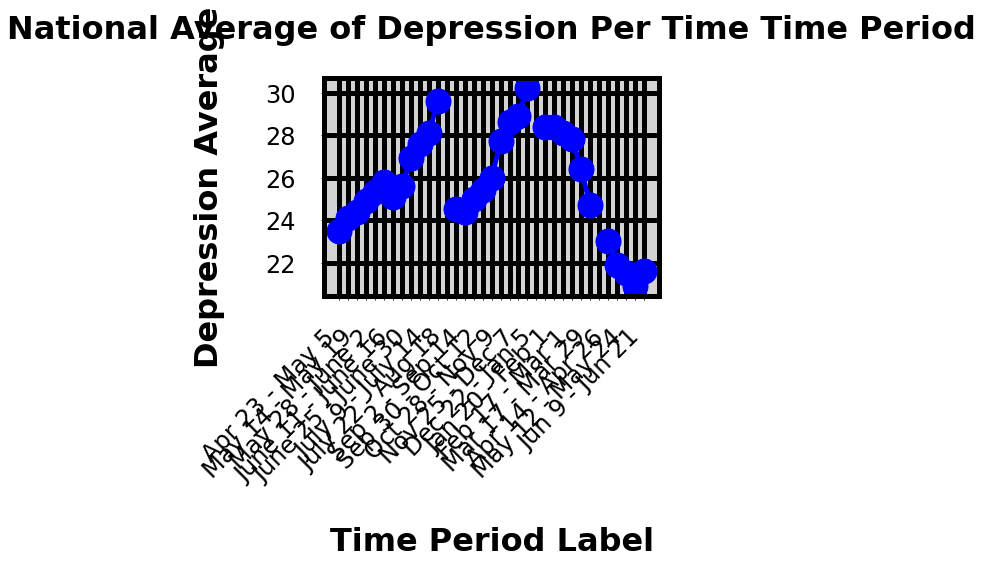

In [9]:
#Get Figures & Axis
fig, ax = plt.subplots()

#Plot Set up Chart
plt.plot(NE['Time Period Label'], NE['Value'], color='blue', marker ='o', linewidth=5, markersize=25)
plt.title('National Average of Depression Per Time Time Period', fontsize=32, pad =40, fontweight="bold")
plt.xlabel('Time Period Label', fontsize=32, labelpad=40, fontweight="bold")
plt.ylabel('Depression Average', fontsize=32, labelpad=40, fontweight="bold")
plt.grid(which='both', linewidth=5, color='black')
plt.grid(True)
plt.rcParams["figure.figsize"] = (40,10)
plt.xticks(rotation = 45, fontsize = 24, ha='right')
plt.yticks(fontsize=24)
plt.rcParams["figure.facecolor"] = 'white'

#Only display every nth x axis label 
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
l = ax.xaxis.get_ticklabels()

#further aesthetic adjsutments
ax.tick_params(axis='both', which='both', pad=25)
ax.set_facecolor('lightgrey')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(5)
l[0].set_visible(True)


#Save and Show
plt.savefig('svg_national_depression.svg')
plt.show()



In [10]:
#ANXIETY CHART

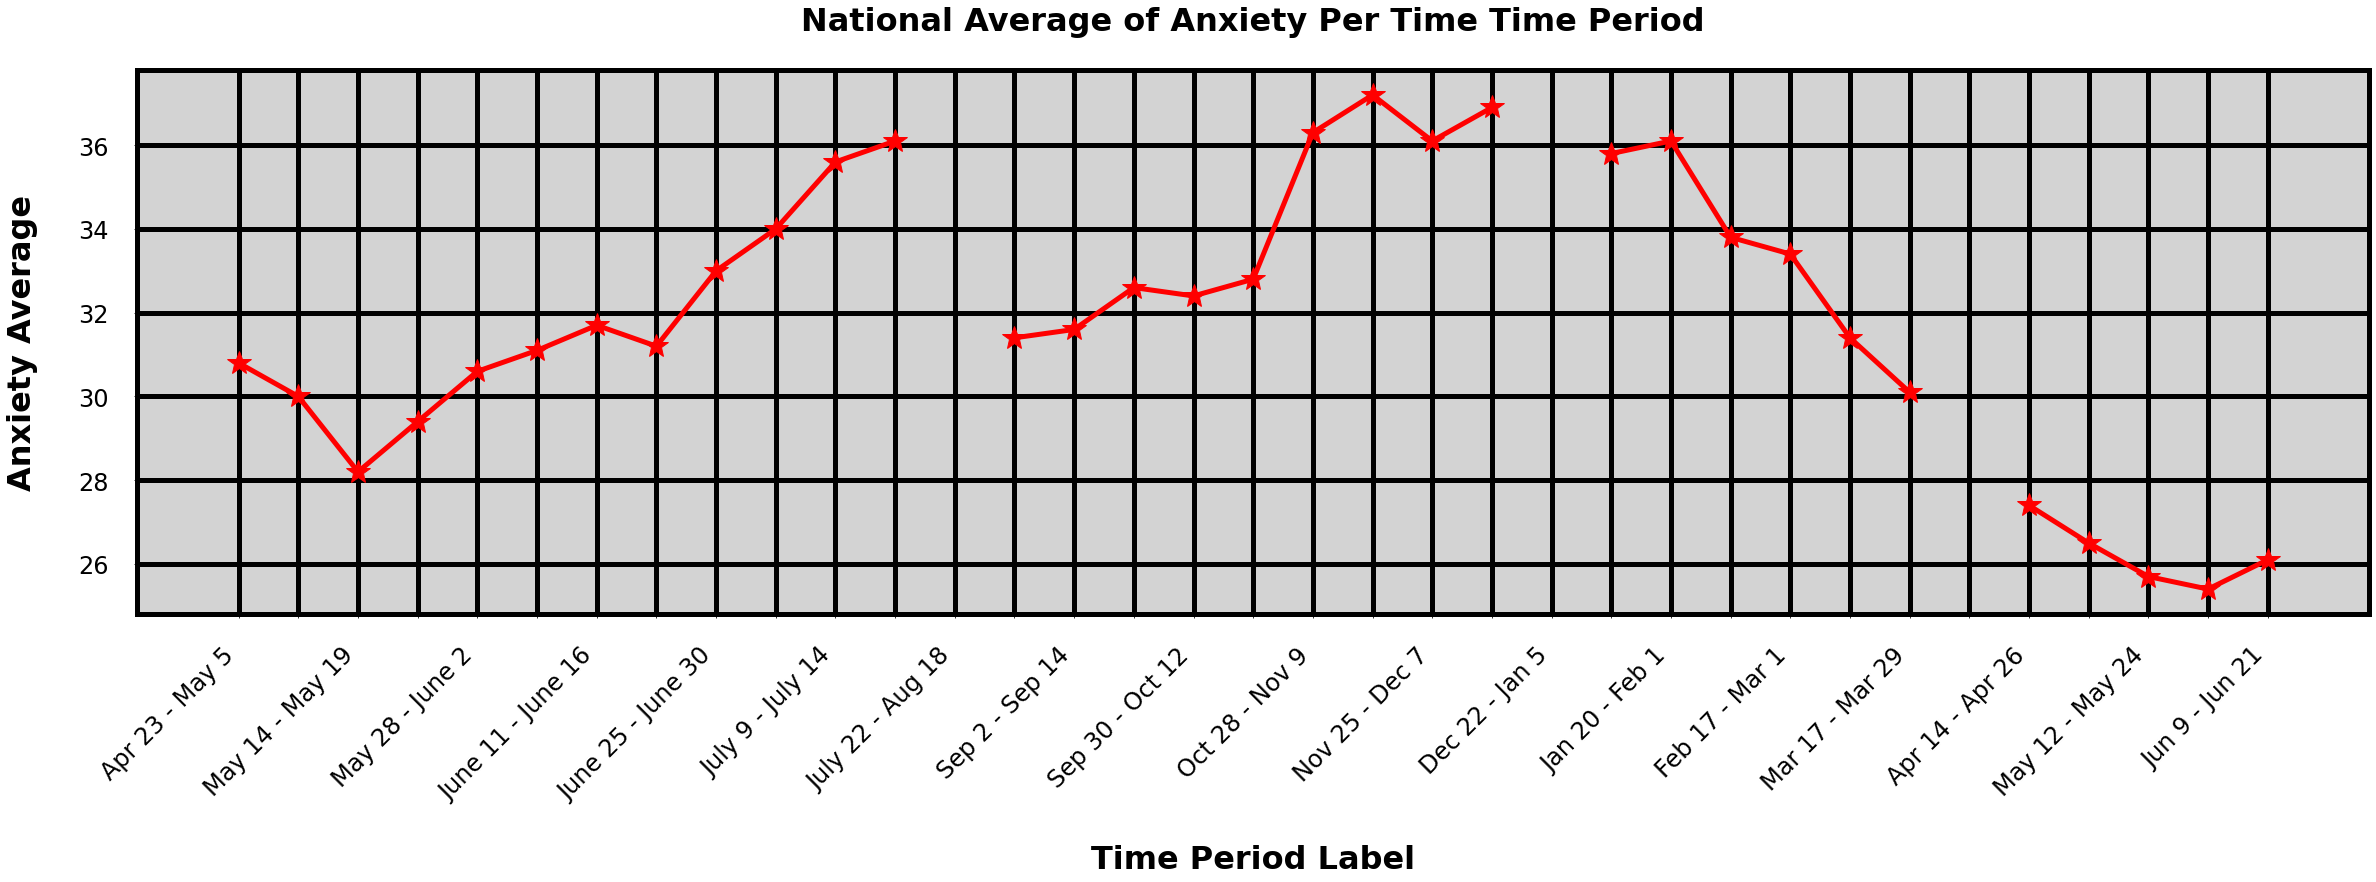

In [11]:
#Get Figures & Axis
fig, ax = plt.subplots()

#Plot Set up Chart
plt.plot(NEA['Time Period Label'], NEA['Value'], color='red', marker ='*', linewidth=5, markersize=25)
plt.title('National Average of Anxiety Per Time Time Period', fontsize=32, pad =40, fontweight="bold")
plt.xlabel('Time Period Label', fontsize=32, labelpad=40, fontweight="bold")
plt.ylabel('Anxiety Average', fontsize=32, labelpad=40, fontweight="bold")
plt.grid(which='both', linewidth=5, color='black')
plt.grid(True)
plt.rcParams["figure.figsize"] = (40,10)
plt.xticks(rotation = 45, fontsize = 24, ha='right')
plt.yticks(fontsize=24)
plt.rcParams["figure.facecolor"] = 'white'

#Only display every nth x axis label 
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
l = ax.xaxis.get_ticklabels()

#further aesthetic adjsutments
ax.tick_params(axis='both', which='both', pad=25)
ax.set_facecolor('lightgrey')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(5)
l[0].set_visible(True)


#Save Show
plt.savefig('svg_national_anxiety.svg')
plt.show()


In [12]:
#BOTH

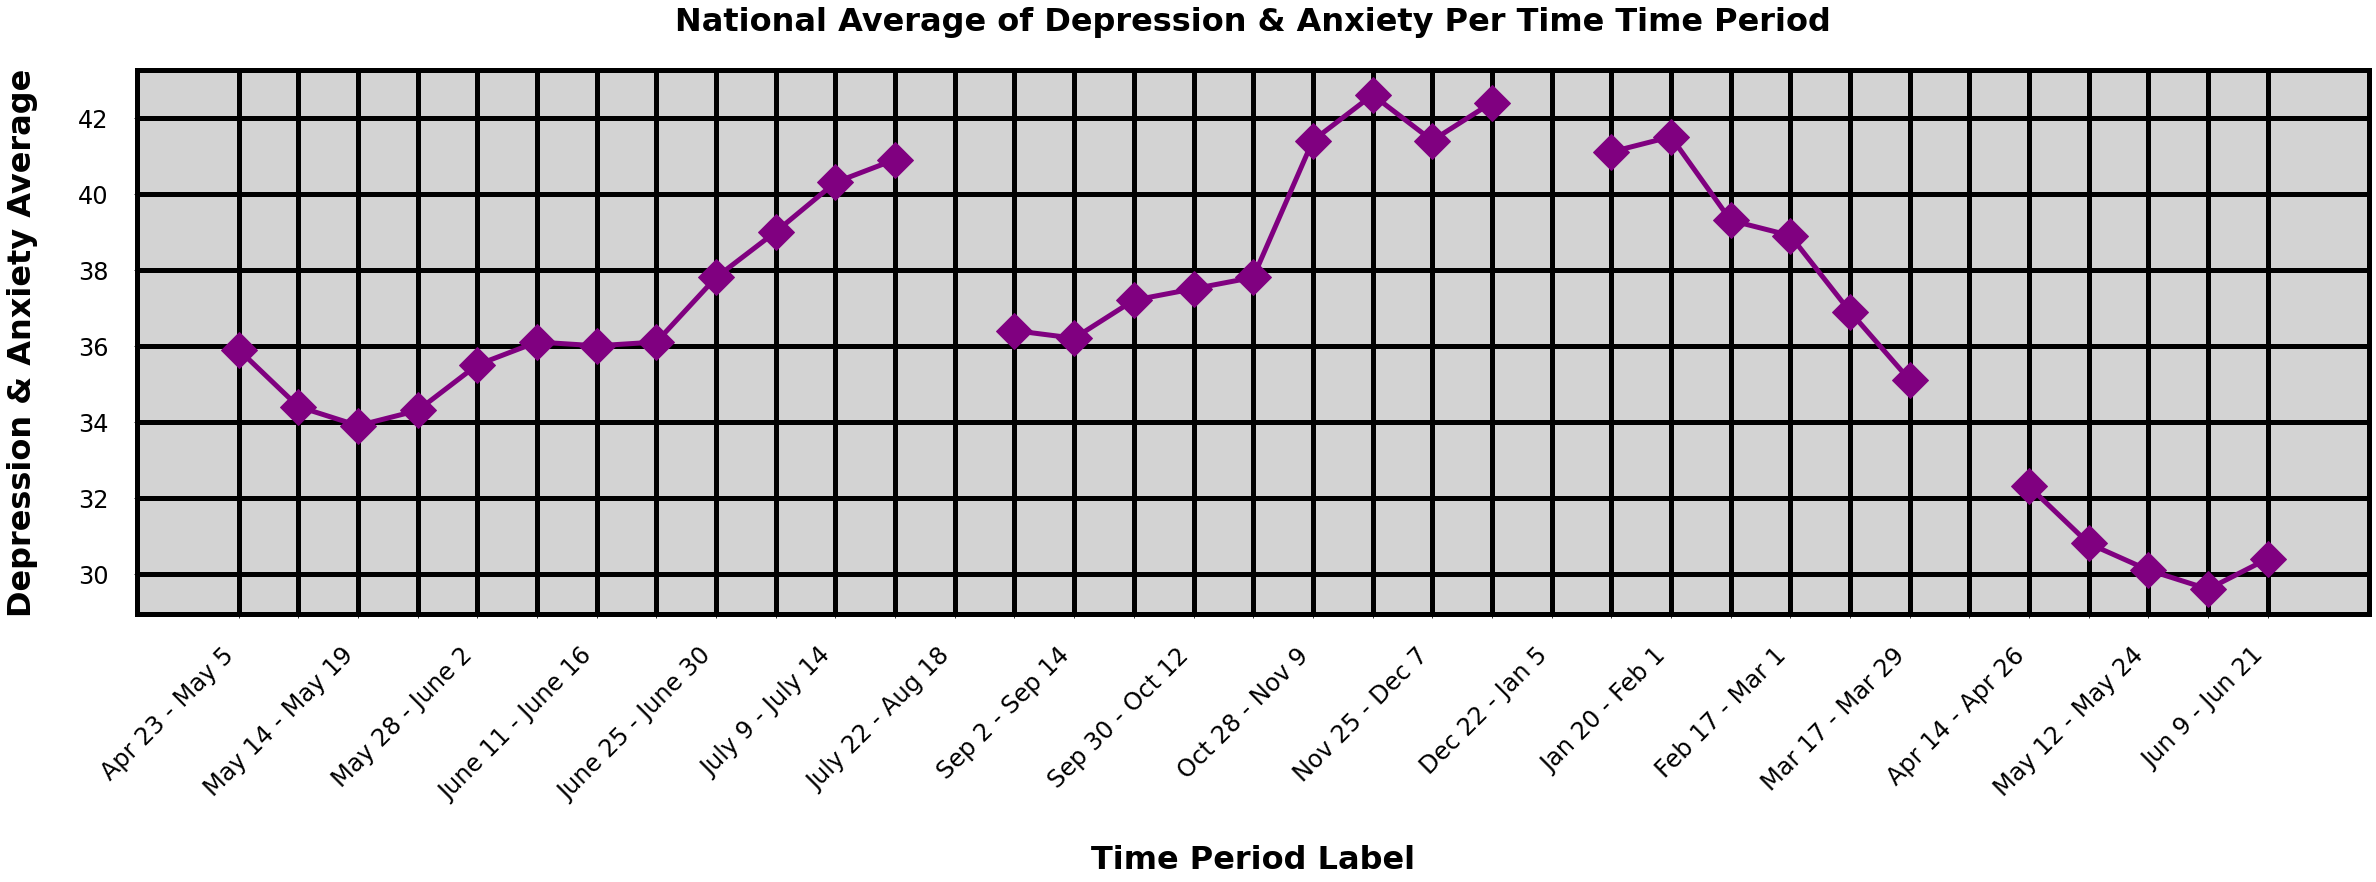

In [13]:
#Get Figures & Axis
fig, ax = plt.subplots()

#Plot Set up Chart
plt.plot(NEB['Time Period Label'], NEB['Value'], color='purple', marker ='D', linewidth=5, markersize=25)
plt.title('National Average of Depression & Anxiety Per Time Time Period', fontsize=32, pad =40, fontweight="bold")
plt.xlabel('Time Period Label', fontsize=32, labelpad=40, fontweight="bold")
plt.ylabel('Depression & Anxiety Average', fontsize=32, labelpad=40, fontweight="bold")
plt.grid(which='both', linewidth=5, color='black')
plt.grid(True)
plt.rcParams["figure.figsize"] = (40,10)
plt.xticks(rotation = 45, fontsize = 24, ha='right')
plt.yticks(fontsize=24)
plt.rcParams["figure.facecolor"] = 'white'

#Only display every nth x axis label 
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
l = ax.xaxis.get_ticklabels()

#further aesthetic adjsutments
ax.tick_params(axis='both', which='both', pad=25)
ax.set_facecolor('lightgrey')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(5)
l[0].set_visible(True)


#Save and Show
plt.savefig('svg_national_both_filter.svg')
plt.show()


In [14]:
#all symptoms

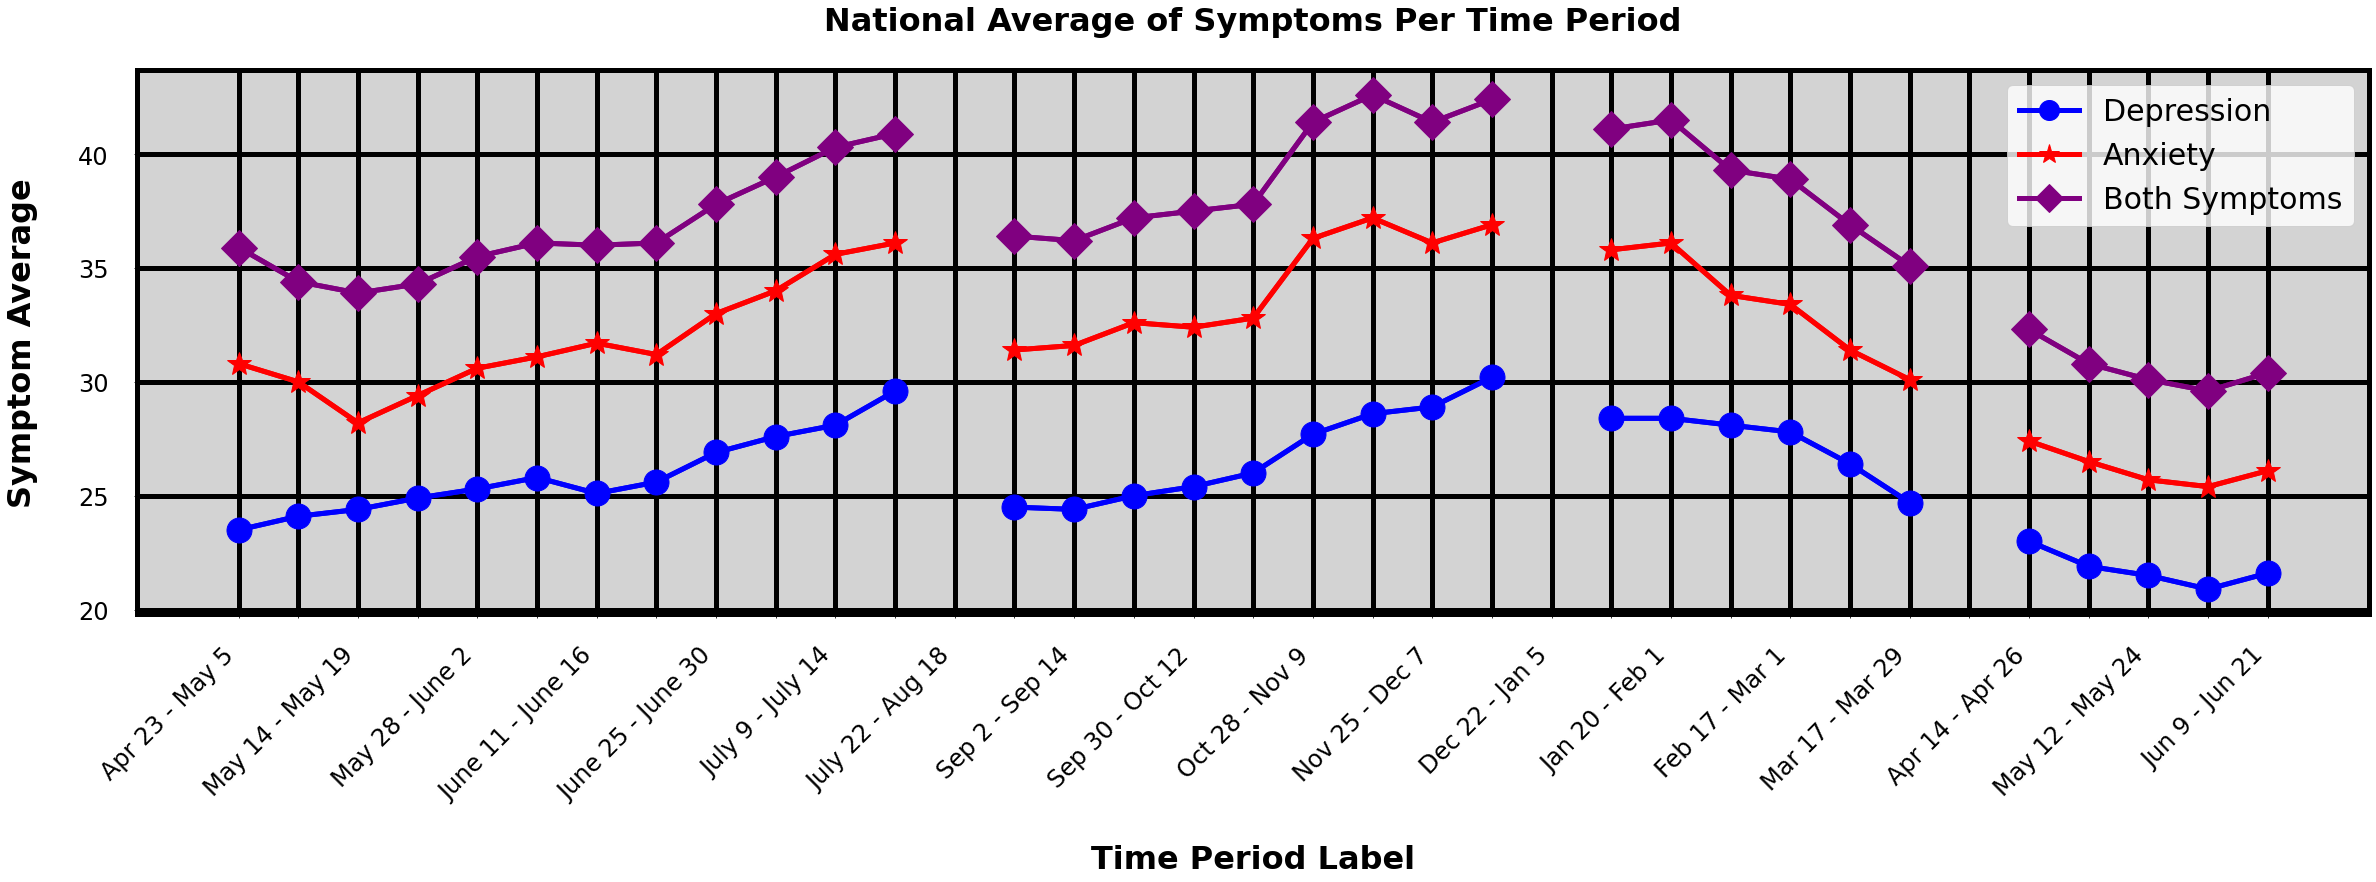

In [15]:
#Get Figures & Axis
fig, ax = plt.subplots()

#Plot Set up Chart
plt.plot(NE['Time Period Label'], NE['Value'], color='blue', marker ='o', linewidth=5, markersize=25)
plt.plot(NEB['Time Period Label'], NEB['Value'], color='purple', marker ='D', linewidth=5, markersize=25)
plt.plot(NEA['Time Period Label'], NEA['Value'], color='red', marker ='*', linewidth=5, markersize=25)
plt.title('National Average of Symptoms Per Time Period', fontsize=32, pad =40, fontweight="bold")
plt.xlabel('Time Period Label', fontsize=32, labelpad=40, fontweight="bold")
plt.ylabel('Symptom Average', fontsize=32, labelpad=40, fontweight="bold")
plt.grid(which='both', linewidth=5, color='black')
plt.grid(True)
plt.rcParams["figure.figsize"] = (40,10)
plt.xticks(rotation = 45, fontsize = 24, ha='right')
plt.yticks(fontsize=24)
plt.rcParams["figure.facecolor"] = 'white'

#Only display every nth x axis label 
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
l = ax.xaxis.get_ticklabels()

#further aesthetic adjsutments
ax.tick_params(axis='both', which='both', pad=25)
ax.set_facecolor('lightgrey')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(5)
l[0].set_visible(True)

#create legend
plt.plot(NE['Time Period Label'], NE['Value'], "-b", marker='o', markersize=20, label="Depression", linewidth=5)
plt.plot(NEA['Time Period Label'], NEA['Value'], "-r", marker='*', markersize=20, label="Anxiety", linewidth=5)
plt.plot(NEB['Time Period Label'], NEB['Value'], "purple", marker='D', markersize=20, label="Both Symptoms", linewidth=5)
#Show
plt.legend(loc="upper right", prop={'size': 30})

#save and show figure
plt.savefig('svg_national_symptoms.svg')
plt.show()


In [16]:
#TESTING OUT

In [17]:
from urllib.request import urlopen
import json

In [18]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [19]:
testdf = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

In [20]:
import plotly.express as px

In [21]:
from pandas import DataFrame

In [22]:
us_state_abbrev = [ 'AL',
            'AK',
            'AZ',
            'AR',
            'CA',
            'CO',
            'CT',
            'DE',
            'DC',
            'FL',
            'GA',
            'HI',
            'ID',
            'IL',
            'IN',
            'IA',
            'KS',
            'KY',
            'LA',
            'ME',
            'MD',
            'MA',
            'MI',
            'MN',
            'MS',
            'MO',
            'MT',
            'NE',
            'NV',
            'NH',
            'NJ',
            'NM',
            'NY',
            'NC',
            'ND',
            'OH',
            'OK',
            'OR',
            'PA',
            'RI',
            'SC',
            'SD',
            'TN',
            'TX',
            'UT',
            'VT',
            'VA',
            'WA',
            'WV',
            'WI',
            'WY'  ]
print(us_state_abbrev)
Ab = DataFrame(us_state_abbrev, columns=['State'])
print(Ab)

['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
   State
0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     DC
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY


In [23]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


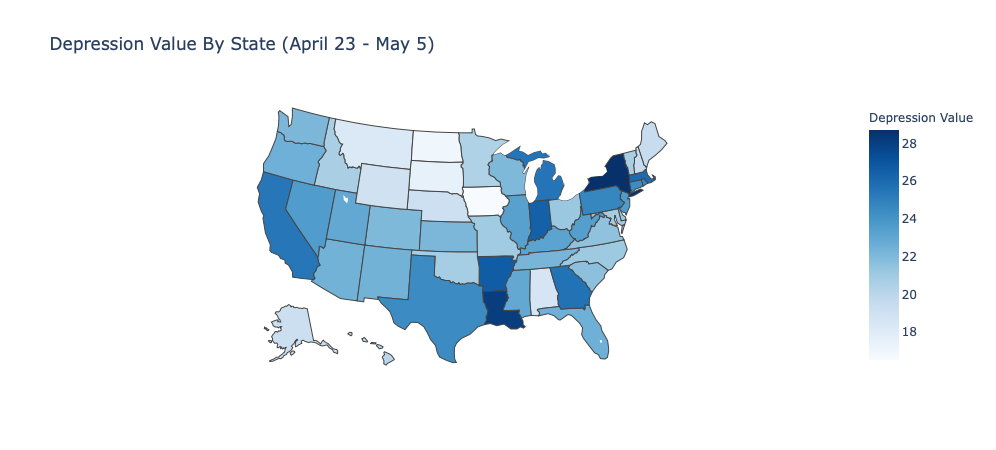

In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=Ab['State'], # Spatial coordinates
    z = isUS['Value'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "Depression Value",
))

fig.update_layout(
    title_text = 'Depression Value By State (April 23 - May 5)',
    geo_scope='usa', # limite map scope to USA
)
fig.write_image('depression_T1_P1.svg')
fig.show()